In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import warnings
plt.style.use('seaborn-ticks')
warnings.filterwarnings('ignore')
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from kmodes.kprototypes import KPrototypes
%matplotlib inline

In [2]:
df = pd.read_csv('Master Table_Final_20211015000557.csv', encoding = 'utf-8-sig')
df

,id,quarter,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,위도,경도,서울구분,6억초과,규제,평당거주비용
0,가곡리_598_신마석신도브래뉴_85,2017_1Q,85.0,199.000000,2008.0,155.0,0.759494,-3.125000,77.889447,7.653846,1.0,37.679384,127.300193,0,0,해당 없음,0.243903
1,가곡리_598_신마석신도브래뉴_85,2017_2Q,85.0,195.916667,2008.0,160.0,-1.549414,3.225806,81.667376,7.535256,6.0,37.679384,127.300193,0,0,해당 없음,0.243389
2,가곡리_598_신마석신도브래뉴_85,2017_3Q,85.0,197.100000,2008.0,165.0,0.603998,3.125000,83.713851,7.580769,10.0,37.679384,127.300193,0,0,해당 없음,0.247638
3,가곡리_598_신마석신도브래뉴_85,2017_4Q,85.0,203.542857,2008.0,170.0,3.268827,3.030303,83.520494,7.828571,7.0,37.679384,127.300193,0,0,조정대상지역,0.264606
4,가곡리_598_신마석신도브래뉴_85,2018_1Q,85.0,183.000000,2008.0,150.0,-10.092645,-11.764706,81.967213,7.038462,1.0,37.679384,127.300193,0,0,조정대상지역,0.243531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355207,흥인동_13-1_청계천 두산위브더제니스_93,2020_2Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,37.566868,127.017130,1,1,투기지구,0.980375
355208,흥인동_13-1_청계천 두산위브더제니스_93,2020_3Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,37.566868,127.017130,1,1,투기지구,0.940333
355209,흥인동_13-1_청계천 두산위브더제니스_93,2020_4Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,37.566868,127.017130,1,1,투기지구,0.984250
355210,흥인동_13-1_청계천 두산위브더제니스_93,2021_1Q,93.0,1085.000000,2014.0,800.0,0.000000,0.000000,73.732719,38.750000,0.0,37.566868,127.017130,1,1,투기지구,1.035917


In [3]:
df.loc[df['서울구분']==0,'서울구분']= '서울x'
df.loc[df['서울구분']==1,'서울구분']= '서울'
df.loc[df['6억초과']==0,'6억초과']= 'X'
df.loc[df['6억초과']==1,'6억초과']= 'O'

In [4]:
df_id = df[['id','위도','경도']]
df = df.drop(['id','위도','경도'],axis=1)

In [6]:
list_quarter = ['2017_1Q','2017_2Q','2017_3Q','2017_4Q','2018_1Q','2018_2Q','2018_3Q','2018_4Q',
                '2019_1Q','2019_2Q','2019_3Q','2019_4Q','2020_1Q','2020_2Q','2020_3Q','2020_4Q','2021_1Q','2021_2Q']
for i in list_quarter:
    globals()['df_{}'.format(i)] = df[df['quarter']== i]

In [25]:
df_2017_1Q.iloc[:,[10,11,12]]

,서울구분,6억초과,규제
0,서울x,X,해당 없음
18,서울x,X,해당 없음
36,서울x,X,해당 없음
54,서울x,X,해당 없음
72,서울x,X,해당 없음
...,...,...,...
355122,서울,O,투기과열지구
355140,서울,O,투기과열지구
355158,서울,O,투기과열지구
355176,서울,O,투기과열지구


In [7]:
kproto = KPrototypes(n_clusters=5,random_state=42, verbose=2,max_iter=100)
kproto.fit_predict(df_2017_1Q.iloc[:,1:], categorical = [9,10,11])

Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8067, ncost: 491448336.7900987
Run: 1, iteration: 2/100, moves: 2891, ncost: 474969986.33576214
Run: 1, iteration: 3/100, moves: 951, ncost: 469514095.097096
Run: 1, iteration: 4/100, moves: 842, ncost: 465396261.49056566
Run: 1, iteration: 5/100, moves: 648, ncost: 462467521.6591916
Run: 1, iteration: 6/100, moves: 592, ncost: 459657730.01992816
Run: 1, iteration: 7/100, moves: 500, ncost: 457866109.6842353
Run: 1, iteration: 8/100, moves: 446, ncost: 456468517.9950921
Run: 1, iteration: 9/100, moves: 459, ncost: 455009846.5869404
Run: 1, iteration: 10/100, moves: 406, ncost: 454061070.21041936
Run: 1, iteration: 11/100, moves: 310, ncost: 453408805.028291
Run: 1, iteration: 12/100, moves: 335, ncost: 4521

Run: 4, iteration: 20/100, moves: 269, ncost: 449825107.07368743
Run: 4, iteration: 21/100, moves: 320, ncost: 448240475.26777023
Run: 4, iteration: 22/100, moves: 326, ncost: 446031050.6524207
Run: 4, iteration: 23/100, moves: 390, ncost: 442192892.8641547
Run: 4, iteration: 24/100, moves: 410, ncost: 438715713.7951924
Run: 4, iteration: 25/100, moves: 386, ncost: 436024798.3881702
Run: 4, iteration: 26/100, moves: 356, ncost: 434203914.77251196
Run: 4, iteration: 27/100, moves: 297, ncost: 433456542.46231514
Run: 4, iteration: 28/100, moves: 238, ncost: 432975318.10959816
Run: 4, iteration: 29/100, moves: 162, ncost: 432797533.39826524
Run: 4, iteration: 30/100, moves: 114, ncost: 432698070.00542974
Run: 4, iteration: 31/100, moves: 86, ncost: 432646684.58333933
Run: 4, iteration: 32/100, moves: 45, ncost: 432629272.50827444
Run: 4, iteration: 33/100, moves: 21, ncost: 432624938.34346795
Run: 4, iteration: 34/100, moves: 15, ncost: 432615546.08755106
Run: 4, iteration: 35/100, moves:

Run: 8, iteration: 2/100, moves: 1338, ncost: 445218572.111471
Run: 8, iteration: 3/100, moves: 418, ncost: 439493007.9733316
Run: 8, iteration: 4/100, moves: 218, ncost: 435597419.3846621
Run: 8, iteration: 5/100, moves: 165, ncost: 433483660.3564821
Run: 8, iteration: 6/100, moves: 176, ncost: 432936183.2811787
Run: 8, iteration: 7/100, moves: 115, ncost: 432777223.4737541
Run: 8, iteration: 8/100, moves: 92, ncost: 432687719.710058
Run: 8, iteration: 9/100, moves: 69, ncost: 432643749.8413861
Run: 8, iteration: 10/100, moves: 39, ncost: 432627923.514729
Run: 8, iteration: 11/100, moves: 18, ncost: 432624155.7428065
Run: 8, iteration: 12/100, moves: 14, ncost: 432615266.36676437
Run: 8, iteration: 13/100, moves: 8, ncost: 432614901.8312106
Run: 8, iteration: 14/100, moves: 1, ncost: 432614897.0891832
Run: 8, iteration: 15/100, moves: 0, ncost: 432614897.0891832
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: init

array([4, 4, 4, ..., 1, 2, 1], dtype=uint16)

,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,서울구분,6억초과,규제,평당거주비용
17,85.0,274.285714,2008.0,213.6,13.234860,-5.066667,77.875000,10.549451,7.0,서울x,X,조정대상지역,0.286945
35,52.0,170.000000,1995.0,100.0,31.782946,0.000000,58.823529,10.625000,1.0,서울x,X,조정대상지역,0.289000
53,64.0,155.000000,1995.0,130.0,0.000000,0.000000,83.870968,8.157895,0.0,서울x,X,조정대상지역,0.221895
71,73.0,240.000000,1995.0,130.0,33.704735,0.000000,54.166667,10.909091,1.0,서울x,X,조정대상지역,0.296727
89,60.0,171.166667,1993.0,135.0,12.928055,-2.409639,78.870497,9.509259,6.0,서울x,X,조정대상지역,0.258652
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355139,117.0,1245.000000,2014.0,690.0,0.000000,0.000000,55.421687,35.571429,0.0,서울,O,투기지구,0.967543
355157,124.0,1625.000000,2014.0,892.5,0.000000,27.500000,54.923077,43.918919,0.0,서울,O,투기지구,1.194595
355175,125.0,1458.000000,2014.0,950.0,0.000000,0.000000,65.157750,38.368421,0.0,서울,O,투기지구,1.043621
355193,148.0,1362.500000,2014.0,1170.0,0.000000,0.000000,85.871560,30.277778,0.0,서울,O,투기지구,0.823556


In [8]:
for i in list_quarter:
    globals()['clusters_{}'.format(i)] = kproto.predict(globals()['df_{}'.format(i)].iloc[:,1:14], categorical = [9,10,11])

In [9]:
for i in list_quarter:
    globals()['df_{}'.format(i)]['cluster'] = globals()['clusters_{}'.format(i)]

In [10]:
print(df_2017_1Q.columns)
list_mean =[]
for i in range(0,5):
    list_mean.append(df_2017_1Q[df_2017_1Q['cluster']==i].describe().iloc[1,:])

Index(['quarter', '전용면적_미제', '거래금액', '건축년도', '보증금', '매매상승률', '전세상승률', '전세가율',
       '평당매매가', '매매빈도', '서울구분', '6억초과', '규제', '평당거주비용', 'cluster'],
      dtype='object')


In [11]:
df_cluster = pd.concat(list_mean,axis=1)

In [12]:
df_cluster = pd.DataFrame(df_cluster)

In [13]:
df_cluster = df_cluster.T.reset_index(drop=True)

In [29]:
df_cluster = (df_cluster / (df_cluster.max()/5))

In [45]:
df_cluster.cluster = ['AFFORDABLE','MID-END','HIGH-END','LUXURY','COMMON']

In [39]:
df_cluster.reset_index(drop=True,inplace=True)

In [42]:
 df_cluster

,전용면적_미제,거래금액,건축년도,보증금,매매상승률,전세상승률,전세가율,평당매매가,매매빈도,평당거주비용,cluster
0,2.634764,0.796341,4.998792,1.188307,1.084228,1.805788,5.000000,1.586129,4.548570,1.586129,AFFORDABLE
1,3.131311,1.388892,5.000000,1.942554,1.575626,1.862252,4.710548,2.345696,3.948552,2.345696,HIGH-END
2,3.837120,2.584329,4.991869,3.158670,2.633663,5.000000,4.152925,3.504382,2.906580,3.504382,MID-END
3,5.000000,5.000000,4.988596,5.000000,5.000000,4.599732,3.517117,5.000000,2.481516,5.000000,LUXURY
4,1.840526,0.402731,4.986048,0.547344,1.366546,1.763535,4.460656,1.163478,5.000000,1.163478,COMMON


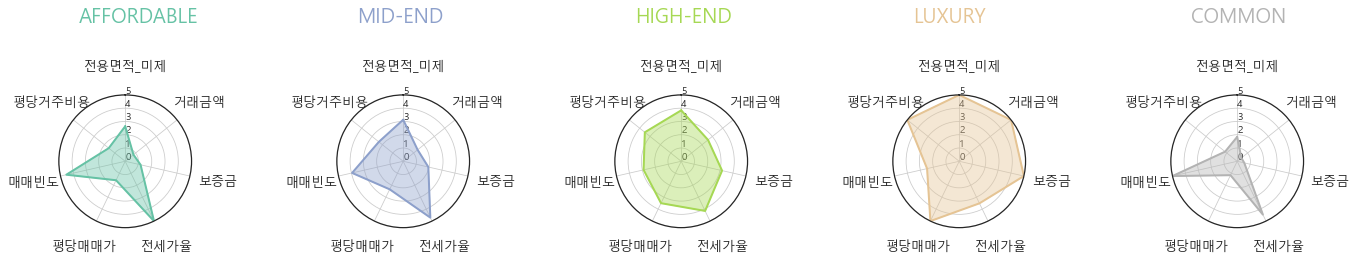

In [63]:
labels = df_cluster.columns[[0,1,3,6,7,8,9]]
num_labels = len(labels)
angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = plt.cm.get_cmap("Set2", len(df_cluster.index))

fig = plt.figure(figsize=(20,50))
fig.set_facecolor('white')

for i, row in df_cluster.iterrows():
    color = my_palette(i)
    data = df_cluster.iloc[i,[0,1,3,6,7,8,9]].tolist()
    data += data[:1]
    
    ax = plt.subplot(1,5,i+1, polar=True)
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다.
    
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([0,1,2,3,4,5],['0','1','2','3','4','5'], fontsize=10) ## y축 눈금 설정
    plt.ylim(0,5)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid') ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.4) ## 도형 안쪽에 색을 채워준다.
    
    plt.title(row.cluster, size=20, color=color,x=0.15, y=1.5, ha='left') ## 타이틀은 캐릭터 클래스로 한다.

plt.tight_layout(pad=5) ## subplot간 패딩 조절
plt.show()

In [47]:
df_id2 = df_id.iloc[df_id['id'].drop_duplicates().index].reset_index(drop=True).copy()

In [48]:
df_id2

,id,위도,경도
0,가곡리_598_신마석신도브래뉴_85,37.679384,127.300193
1,가능동_106-16_녹양2차동원아파트_52,37.755640,127.037852
2,가능동_106-16_녹양2차동원아파트_64,37.755640,127.037852
3,가능동_106-16_녹양2차동원아파트_73,37.755640,127.037852
4,가능동_106-21_동원_60,37.756264,127.038229
...,...,...,...
19729,흥인동_13-1_청계천 두산위브더제니스_117,37.566868,127.017130
19730,흥인동_13-1_청계천 두산위브더제니스_124,37.566868,127.017130
19731,흥인동_13-1_청계천 두산위브더제니스_125,37.566868,127.017130
19732,흥인동_13-1_청계천 두산위브더제니스_148,37.566868,127.017130


In [49]:
df_id2.iloc[df_id2[['위도','경도']].drop_duplicates().index]

,id,위도,경도
0,가곡리_598_신마석신도브래뉴_85,37.679384,127.300193
1,가능동_106-16_녹양2차동원아파트_52,37.755640,127.037852
4,가능동_106-21_동원_60,37.756264,127.038229
6,가능동_15-25_금용_60,37.749174,127.049398
8,가능동_15-552_가재울일신건영휴먼빌_60,37.752629,127.045317
...,...,...,...
19721,흑석동_336_흑석한강푸르지오_116,37.503208,126.965450
19724,흑석동_339_흑석한강센트레빌Ⅱ_120,37.502213,126.958585
19727,흑석동_38-58_명수대한양_85,37.504901,126.966573
19728,흥인동_119_동대문 와이즈 캐슬_16,37.565855,127.015480


In [50]:
19734 - 9098

10636

In [51]:
df_id2['id2'] = df_id2['id'].str.split('_').str[0]+'_'+df_id2['id'].str.split('_').str[1]+'_'+df_id2['id'].str.split('_').str[2]

In [52]:
list_id2 = df_id2['id2'].drop_duplicates()

In [53]:
list_id1 = df_id2.iloc[df_id2[['위도','경도']].drop_duplicates().index]['id2']

In [54]:
list_id3 = set(list_id2) - set(list_id1)

In [55]:
9330  - 9098

232

In [58]:
list_id3

{'가좌동_30-2_진주2',
 '갈산동_362_하나',
 '개포동_12_성원대치2단지아파트',
 '개포동_185_개포주공 7단지',
 '개포동_649_경남2차',
 '계산동_1084-2_은행마을(삼보)',
 '계산동_1085-2_은행마을(태평)',
 '광장동_218-1_극동2',
 '교문동_809-1_하나(한성)',
 '교문동_809-2_구리(한양)',
 '교문동_809-3_교문(동양고속)',
 '교문동_820_장자마을금호1-2',
 '구미동_201_무지개(3단지)(신한)',
 '구미동_222_무지개(10단지)(삼성)',
 '구미동_63_까치마을(4단지)(선경)',
 '권선동_1267_한성',
 '금곡동_177_청솔마을(영남)',
 '금곡동_530_엘지빌리지3',
 '금정동_875_퇴계주공(360~368동)',
 '내손동_844_인덕원 센트럴 자이 2단지',
 '다산동_4002-1_부영e그린2차',
 '다산동_4002-1_부영e그린3차',
 '다산동_4002-1_부영e그린4,5차',
 '당하동_895-1_탑스빌(신대진)',
 '당하동_895-1_탑스빌(영남)',
 '대치동_506_선경2차(8동-12동)',
 '대치동_511_한보미도맨션2',
 '대화동_2570_휴먼빌(6단지)',
 '대화동_2580_현대I-PARK(8)',
 '대화동_2580_현대I-PARK(9)',
 '덕소리_145-4_코오롱',
 '돈암동_609-1_한진(609-1)',
 '동춘동_923_동아',
 '동춘동_924-3_자이(xi)',
 '동춘동_924_현대',
 '마두동_717_백마마을(한성)',
 '마두동_732_백마마을(한양)',
 '마두동_734_백마마을(한양4)',
 '마두동_739_백마마을(삼환)',
 '마두동_787_강촌마을(영남)',
 '마두동_787_강촌마을(진흥)',
 '마두동_796_강촌마을(코오롱)',
 '만수동_29_만수주공2단지',
 '매탄동_897_매탄주공5',
 '묵동_20_신내두산',
 '민락동_691-1_산들마을(신안)',
 '민락동_691-1_산들마을(현대

In [57]:
len(set(list_id1).difference(list_id2))

0

In [94]:
df_id2[df_id2['id'].str.contains('신곡동_722-1_현대3')]

,id,위도,경도,id2
10552,신곡동_722-1_현대3_97,37.7296657,127.055499,신곡동_722-1_현대3


In [90]:
df_id2['위도'] = df_id2['위도'].astype('str')

In [95]:
df_id2[df_id2['위도'].str.contains('37.7296657')]

,id,위도,경도,id2
10550,신곡동_722-1_장암동신_115,37.7296657,127.055499,신곡동_722-1_장암동신
10551,신곡동_722-1_장암동신_97,37.7296657,127.055499,신곡동_722-1_장암동신
10552,신곡동_722-1_현대3_97,37.7296657,127.055499,신곡동_722-1_현대3


0